## Model Selection.

We have diferent models and we would like to know which one discribe better our data. 
We are going to use the Frequentist and Bayesian approach.

## Frenquentist

If you want to use this model its beacuse you have measured a lot of times.

For this we would use $\chi^2$ method.

IF you have to different distirbution of $\chi^2$  from two different models how you would pick which one is the best model. 

Having the smallest $\chi^2$ doesn't mean that you have the best model (e.g your fit can imporve if you high order polynomiun but this doesn't mean that the model would be better.)

### F test

\begin{equation}
F = \dfrac{\chi^2 (m) - \chi^2(m+1)}{\chi^2(m)/(N-m+1)}
\end{equation}

$m:$ # of parameters
$N:$ # of data points

Nested models.

Then you make a good distribution of your $F$ values, and used when the models have one diferent in the number of parameters.

Also the model with $m$ parameters doens't have to be a boundary of the model of the $m+1$ parameter model.

See : http://adsabs.harvard.edu/abs/2002ApJ...571..545P

dont used when:

-There are not nested models
-The models doenst have a different of one in $m$
-The model with $m$ parameters doens't have to be a boundary of the model of the $m+1$ parameter model

# Bayesian 

## Information criteria 

AIC: Akaike information criteria (http://www.unt.edu/rss/class/Jon/MiscDocs/Akaike_1974.pdf)
BIC: Bayesian information criteria

If i have a given bayesian model and I would like to ask what is the relaive osteiror likelihood of each model. 


AIC: $-2Ln L_{max} + 2k$

$k: $ model parameters
$L_{max}: $ The maximum of the Likelihood

You have a number of models, you find the likelihood of those models, ou get the most likely velues of that models and you compute AIC for each model. 

If the AIC is small the models is best.
 
| $\Delta AIC$ | |
|-----|-----|
|<2 | inconclusive |
|2-6 | Positive evidence|
|6-10 | strong|
|>10 | Very strong evidence|


The information entropy of the posterior 

$H_{post} = \sum P(model|data)ln([P(model|data)])$

$H_{prior} = \sum P_{pr}(model)ln([P_{pr}(model)])$

You would like the model tha maximize the amount of information, this is the one they maximize $H_{post}$

Kullback-Leibler

$D_{KL} = \sum_{model} P(model|data) Ln \left[ \dfrac{P(model|data)}{P_{pr}(model)} \right]$


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Ansombe's quartert

x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x2 = x1
y2 = np.array([9.14, 8.14, 8.74,8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])


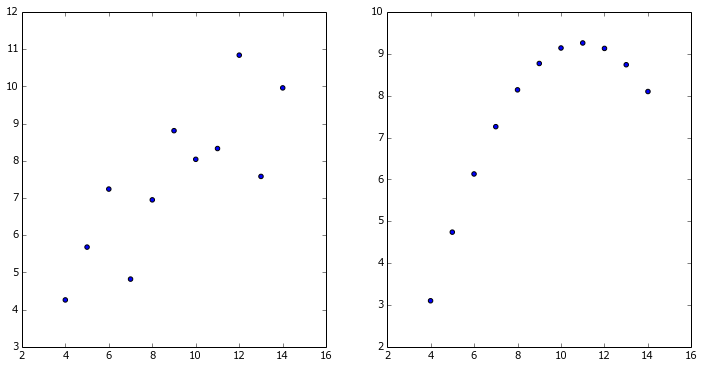

In [3]:
figure(figsize=(12,6))
subplot(1, 2, 1)
scatter(x1, y1)
subplot(1, 2, 2)
scatter(x2, y2)

In [4]:
def likelihood1(x_i, y_i, a, b, sigma):
    L = -0.5 * np.sum((y_i - a - b*x_i)**2.0/(sigma**2.0))
    return L    

def likelihood2(x_i, y_i, a, b, c, sigma):
    L = -0.5 * np.sum((y_i - a - b*x_i - c*x_i**2.0)**2.0/(sigma**2.0))
    return L

In [5]:
def AIC(k, L_max):
    return 2*log(L_max) + 2*k

In [6]:
a1 = np.linspace(2, 4, 100)
b1 = np.linspace(0.3, 0.8, 100)

L1 = np.zeros((len(a1), len(b1)))
L2 = np.zeros((len(a1), len(b1)))


In [7]:
for i in range(len(a1)):
    for j in range(len(b1)):
        L1[i][j] = likelihood1(x1, y1, a1[i], b1[j], 1.0)
        
        
for i in range(len(a1)):
    for j in range(len(b1)):
        L2[i][j] = likelihood1(x2, y2, a1[i], b1[j], 1.0)

In [8]:
print np.max(L1)
print np.max(L2)

-6.88183260382
-6.88865280584


In [10]:
index1 = np.where(L1 == np.max(L1))
a1_best = a1[index1[0]]
b1_best = b1[index1[1]]

print a1_best, b1_best

[ 2.98989899] [ 0.5020202]


In [12]:
l2_best = likelihood2(x1, y1, 0.75507, 1.0693, -0.03162, 1.0) 
l3_best = likelihood2(x2, y2, -5.996, 2.7808, -0.12671, 1.0)

aic1_m1 = AIC(2, np.exp(np.max(L1))) # Linear model to linear data
aic2_m1 = AIC(2, np.exp(np.max(L2))) # Linear model to cuadratic data

aic1_m2 = AIC(3, (np.exp(l2_best))) # Cuadratic model to linear data
aic2_m2 = AIC(3, (np.exp(l3_best))) # Cuadratic model to cuadratic data


#print aic1, aic2

print aic1_m1 - aic1_m2

print aic2_m1 - aic2_m2



-2.85882466893
-15.7772820608


# Bayesian Evidence (BIC) (http://projecteuclid.org/euclid.aos/1176344136)

Model parameter $i=(1, 2)$ 

$i=1$ Linear

$i=2$ Cuadratic

$P(i, a, b, c | data) = P_{pr}(i, a, b, c)P(data|model)$

$P_{pr}(i, a, b, c) = \dfrac{C}{b} \dfrac{1}{\sqrt(c)}$


$P(data|model) = \left( \prod \dfrac{1}{\sqrt{2\pi \sigma_i^2}} \right) exp(-\dfrac{1}{2} \sum(y_i-a-bx_i-c x_i^2)^2/ \sigma_i^2)$


$P(data|model) = \left( \prod \dfrac{1}{\sqrt{2\pi \sigma_i^2}} \right) exp(-\dfrac{1}{2} \sum(y_i-a-bx_i)^2/ \sigma_i^2)$


$BE_i = \int\int \int P(i, a, b, c | data)da db dc$

Odds ratio:

$\dfrac{BE_i}{BE_j} = \dfrac{\int\int\int P(i, a, b, c | data)da db dc}{\int\int \int P(j, a, b, c | data)da db dc}$


$BIC =  - 2 ln L_{max} + K ln N$

$K: $ # of model parameters

$N: $ # of data models

